# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [13]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

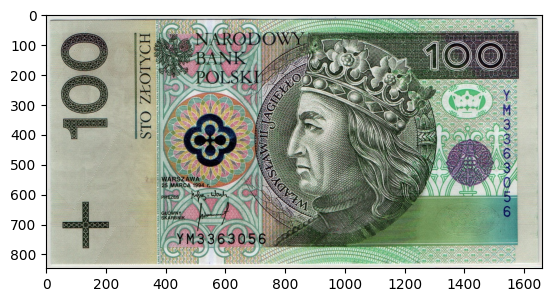

In [62]:
img = cv2.imread(fileName)

plt.imshow(img)
plt.show()

# Dekompozycja

In [71]:
def decompose(img):
    bit_planes = []

    for i in range(8):
        bit_plane = img & (1 << i)
        bit_planes.append(bit_plane)

    return bit_planes

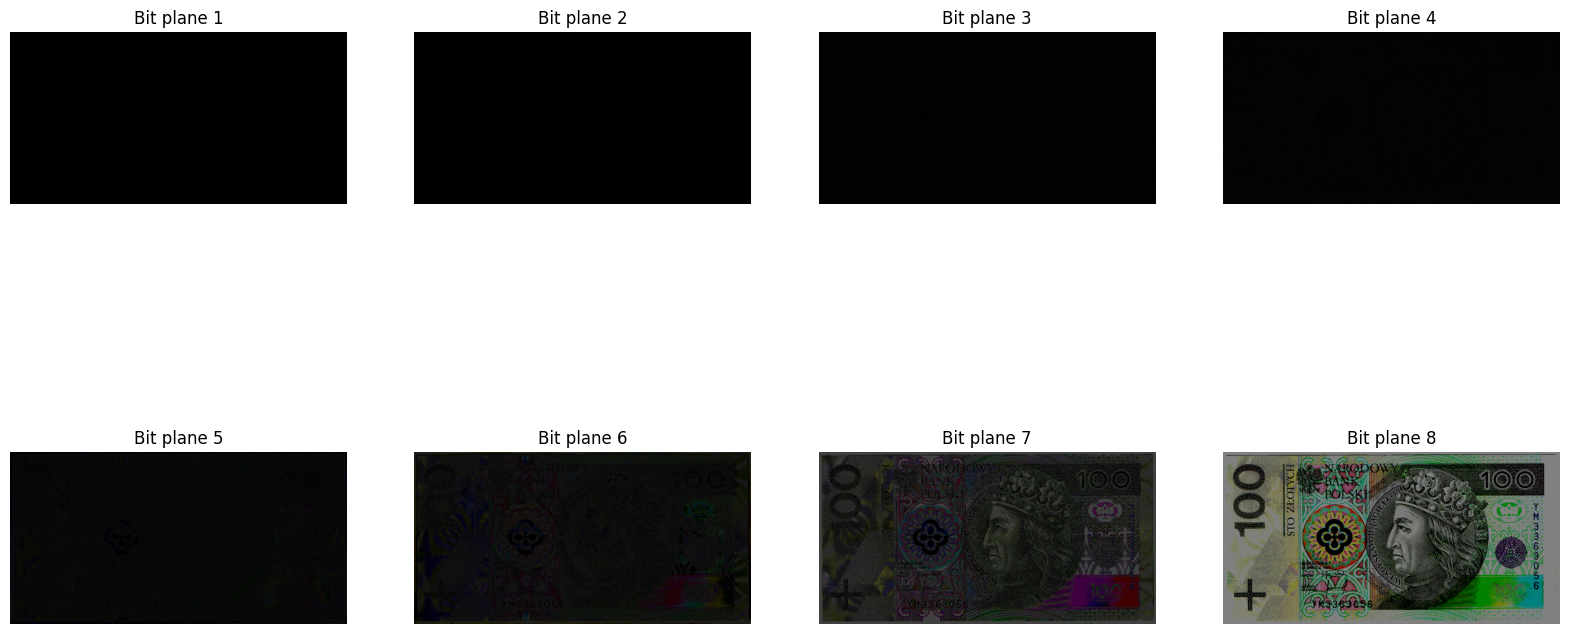

In [72]:
bit_planes = decompose(img)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i in range(8):
    axs[i // 4, i % 4].imshow(bit_planes[i], cmap='gray')
    axs[i // 4, i % 4].axis('off')
    axs[i // 4, i % 4].set_title(f'Bit plane {i + 1}')

# Rekonstrukcja

In [104]:
def reconstruct(bit_planes, bits):
    img = np.zeros(bit_planes[0].shape, dtype=np.uint8)
    
    for i in bits:
        np.add(img, bit_planes[i - 1], out=img)

    return img
    

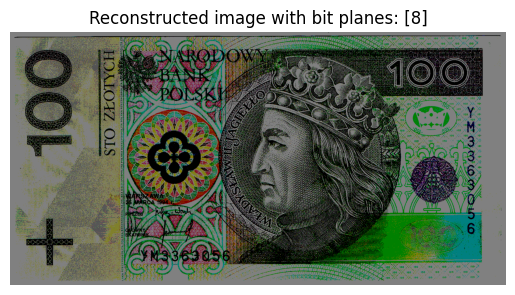

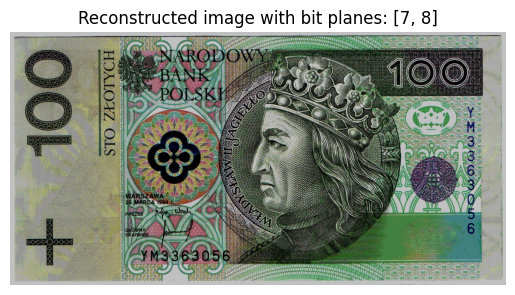

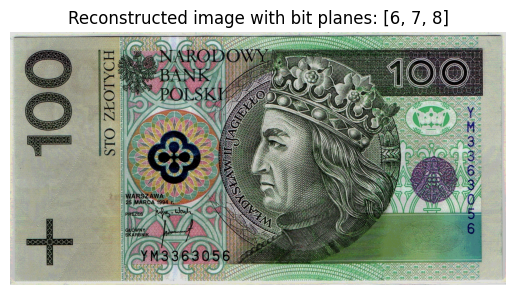

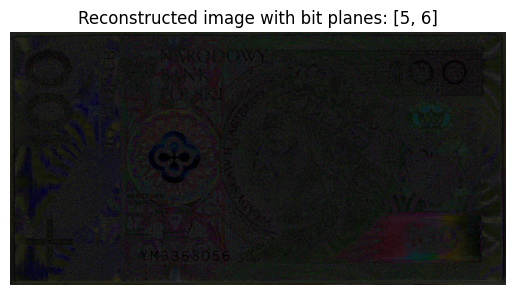

In [106]:
for bits in [[8], [7, 8], [6, 7, 8], [5, 6]]:
    img_reconstructed = reconstruct(bit_planes, bits)
    plt.imshow(img_reconstructed, cmap='gray')
    plt.axis('off')
    plt.title(f'Reconstructed image with bit planes: {bits}')
    plt.show()
